In [1]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
len(Y_train)

60000

In [9]:
len(X_train[0])

28

In [10]:
import numpy as np

In [12]:
np.shape(X_train)

(60000, 28, 28)

In [14]:
X_train_reshape = X_train.reshape(-1, 28, 28, 1)

In [15]:
np.shape(X_train_reshape)

(60000, 28, 28, 1)

In [17]:
X_test_reshape = X_test.reshape(-1, 28, 28, 1)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
Y_train_reshape = to_categorical(Y_train)

In [20]:
Y_test_reshape = to_categorical(Y_test)

In [22]:
Y_train_reshape[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
Y_train_reshape = Y_train_reshape.astype('uint8')

In [24]:
Y_test_reshape = Y_test_reshape.astype('uint8')

In [27]:
X_train = X_train_reshape[:50000,:]

In [28]:
Y_train = X_train_reshape[:50000,:]

In [29]:
X_val = X_train_reshape[50000:,:]

In [30]:
Y_val = Y_train_reshape[50000:,:]

In [31]:
Y_train = Y_train_reshape[:50000,:]

In [32]:
np.shape(X_train)

(50000, 28, 28, 1)

In [33]:
dir()

['In',
 'Out',
 'X_test',
 'X_test_reshape',
 'X_train',
 'X_train_reshape',
 'X_val',
 'Y_test',
 'Y_test_reshape',
 'Y_train',
 'Y_train_reshape',
 'Y_val',
 '_',
 '_12',
 '_13',
 '_15',
 '_22',
 '_32',
 '_5',
 '_6',
 '_7',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'mnist',
 'np',
 'quit',
 'to_categorical']

In [34]:
mean_val = np.mean(X_train, axis=0)

In [35]:
std_val = np.std(X_train)

In [36]:
X_train_normal = (X_train - mean_val)/std_val

In [37]:
X_val_normal = (X_val - mean_val)/std_val

In [39]:
X_test_reshape = X_test.reshape((-1,28,28,1))

In [40]:
np.shape(X_test_reshape)

(10000, 28, 28, 1)

In [43]:
X_test_normal = (X_test_reshape - mean_val)/std_val

In [44]:
from tensorflow.keras.models import Sequential

In [45]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(32, (5,5), padding='valid', activation='relu', input_shape=(28,28,1)))

In [49]:
model.add(MaxPooling2D((2,2)))

In [50]:
model.add(Conv2D(64, (5,5), padding='valid', activation='relu'))

In [51]:
model.add(MaxPooling2D((2,2)))

In [52]:
model.add(Flatten())

In [53]:
model.add(Dense(1024, activation='relu'))

In [54]:
model.add(Dropout(0.5))

In [55]:
model.add(Dense(10, activation='softmax'))

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [57]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
import time

In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [61]:
callback_list = [ModelCheckpoint(filepath='cnn_checkpoint.h5', monitor='val_loss', save_best_only=True), TensorBoard(log_dir='log/{}'.format(time.asctime()))]

In [62]:
history = model.fit(X_train_normal, Y_train, batch_size=64, epochs=20, validation_data=(X_val_normal, Y_val), callbacks=callback_list)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 76s 2ms/sample - loss: 0.1365 - accuracy: 0.9577 - val_loss: 0.0481 - val_accuracy: 0.9859
Epoch 2/20
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.0481 - accuracy: 0.9848 - val_loss: 0.0436 - val_accuracy: 0.9888
Epoch 3/20
50000/50000 [==============================] - 77s 2ms/sample - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0354 - val_accuracy: 0.9903
Epoch 4/20
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0393 - val_accuracy: 0.9906
Epoch 5/20
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.0234 - accuracy: 0.9929 - val_loss: 0.0388 - val_accuracy: 0.9903
Epoch 6/20
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0349 - val_accuracy: 0.9908
Epoch 7/20
50000/50000 [==============================] 

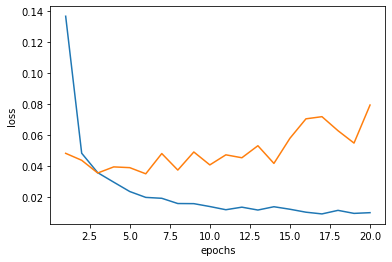

In [64]:
import matplotlib.pyplot as plt
epochs = np.arange(1,21)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

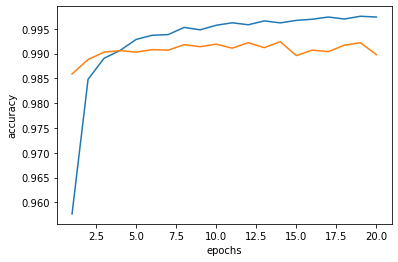

In [65]:
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [66]:
model.save('cnn_model.h5')

In [68]:
from tensorflow.keras.models import load_model
restored_model = load_model('cnn_model.h5')

In [73]:
restored_model.load_weights('cnn_checkpoint.h5')

In [74]:
Y_test = Y_test.astype('uint8')

In [76]:
restored_model.evaluate(X_test_normal, Y_test_reshape)

10000/10000 [==============================] - 4s 427us/sample - loss: 0.0292 - accuracy: 0.9918


[0.02917629219463197, 0.9918]

In [77]:
np.argmax(restored_model.predict(X_test_normal[:10]), axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [78]:
Y_test_reshape[:10]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=uint8)

In [79]:
Y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [80]:
fig = plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

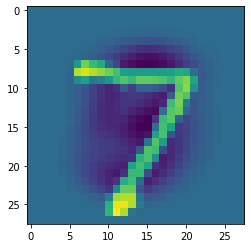

In [84]:
plt.imshow(X_test_normal[0].reshape(28,28))

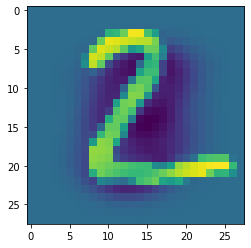

In [85]:
plt.imshow(X_test_normal[1].reshape(28,28))

In [86]:
first_layer = model.layers[0]

In [87]:
print(first_layer)

In [88]:
print(model.input)

Tensor("conv2d_input:0", shape=(None, 28, 28, 1), dtype=float32)


In [93]:
from tensorflow.keras.models import Model
first_activation = Model(inputs=model.input, outputs=first_layer.output)

In [95]:
activation = first_activation.predict(X_test_normal[:10])

In [96]:
print(activation.shape)

(10, 24, 24, 32)


In [97]:
activation

array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0. 

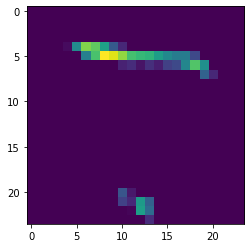

In [98]:
plt.imshow(activation[0,:,:,0])

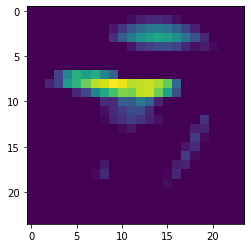

In [99]:
plt.imshow(activation[0,:,:,1])

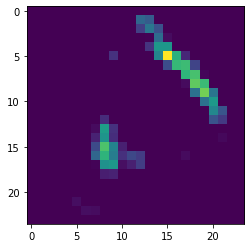

In [100]:
plt.imshow(activation[3,:,:,0])

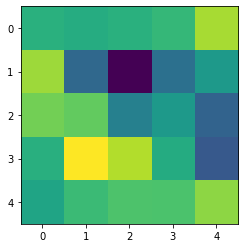

In [101]:
plt.imshow(first_layer.kernel[:,:,0,0])

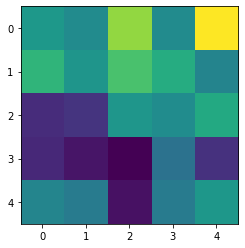

In [102]:
plt.imshow(first_layer.kernel[:,:,0,1])